In [1]:
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from tqdm import trange
import time
from datetime import datetime
from preprocess import load_data, preprocess_data, apply_projection_transform, visualize_dataset, images_show, visualize_dataset, summarize_histogram,ahisteq

import pandas as pd

from skimage import img_as_ubyte, img_as_float
import cv2

import numpy as np
import math
from random import randint
from collections import namedtuple

%matplotlib inline


Modules Imported


Data and Modules loaded
Data and Modules loaded
Data and Modules loaded
Saved File Summary as: Summary20180522-0549


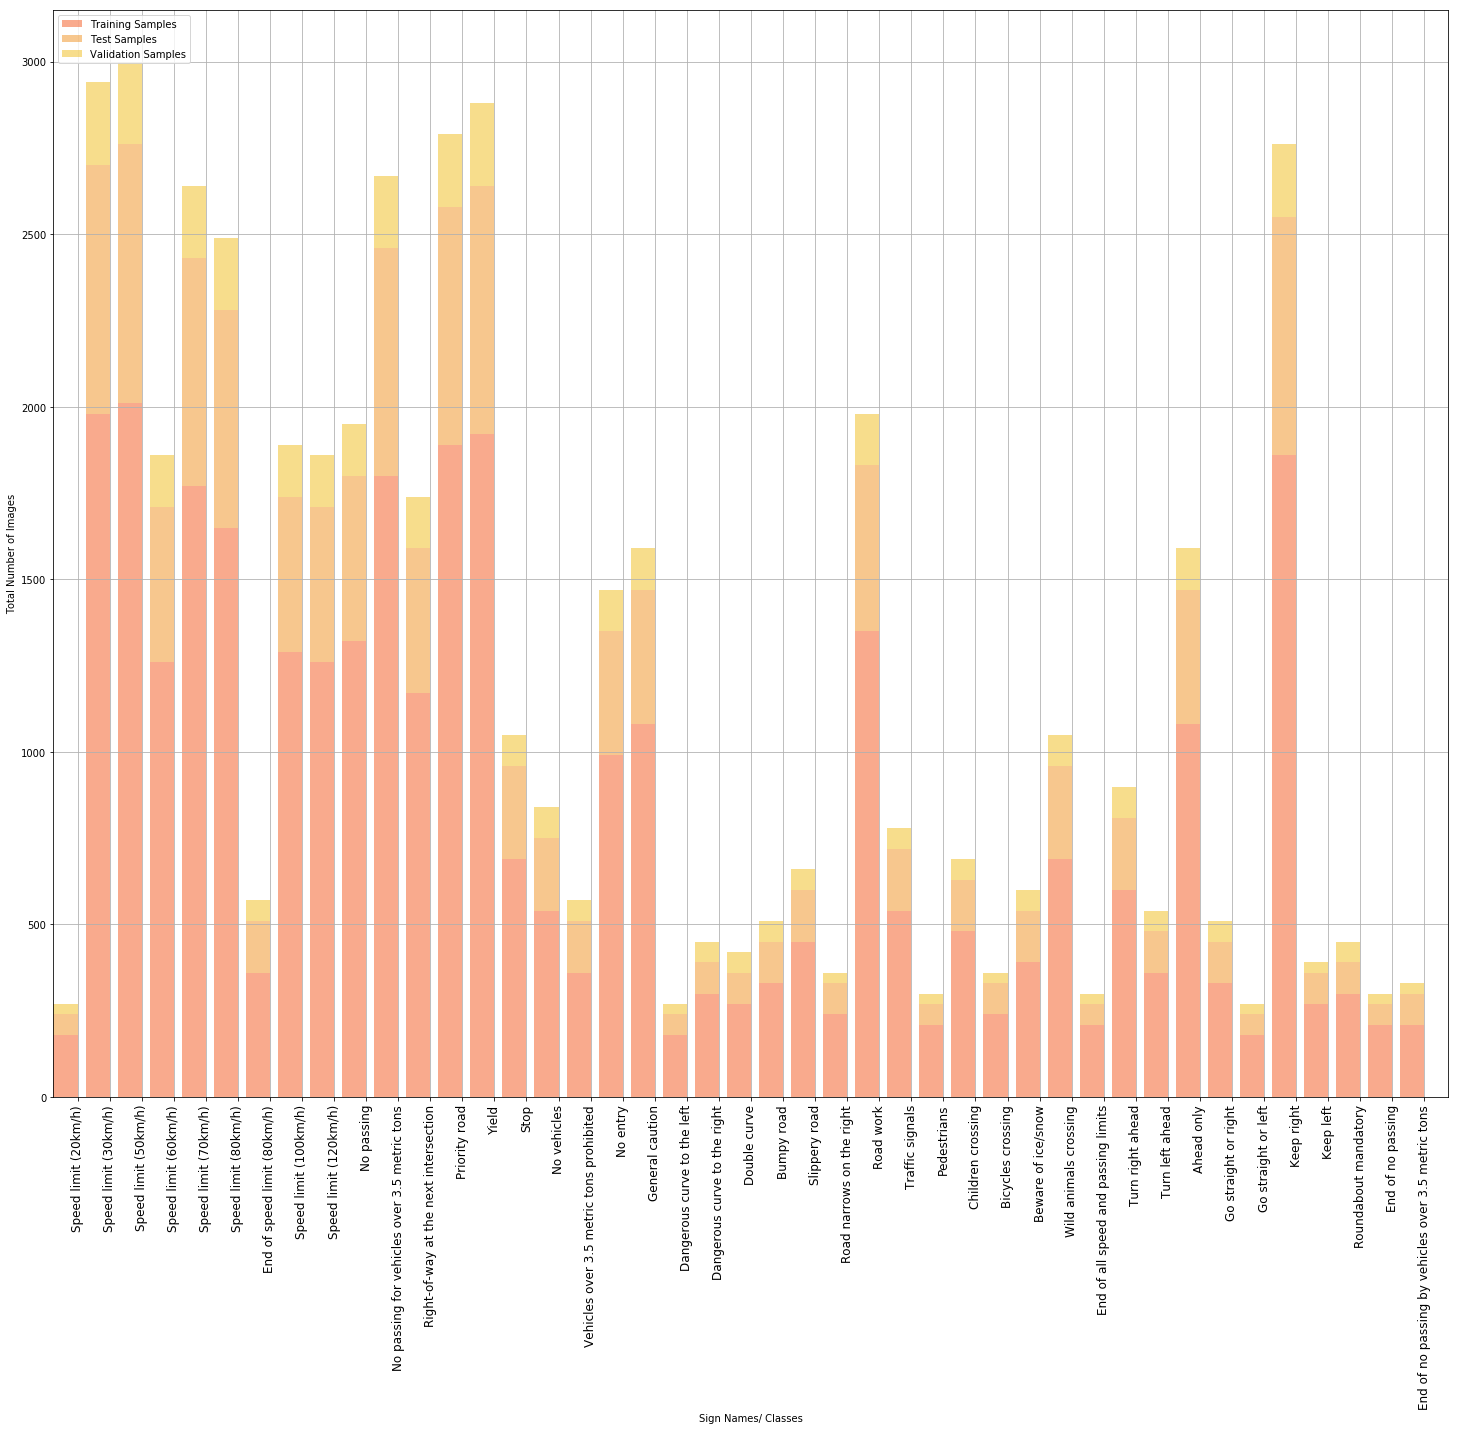

Data and Modules loaded


,ClassId,SignName,Counts,Horizontally Flippable,Vertically Flippable,Flippable Both Ways,CrossFlippable
0,0,Speed limit (20km/h),180,no,no,no,no
1,1,Speed limit (30km/h),1980,no,yes,no,no
2,2,Speed limit (50km/h),2010,no,no,no,no
3,3,Speed limit (60km/h),1260,no,no,no,no
4,4,Speed limit (70km/h),1770,no,no,no,no
5,5,Speed limit (80km/h),1650,no,yes,no,no
6,6,End of speed limit (80km/h),360,no,no,no,no
7,7,Speed limit (100km/h),1290,no,no,no,no
8,8,Speed limit (120km/h),1260,no,no,no,no
9,9,No passing,1320,no,no,no,no


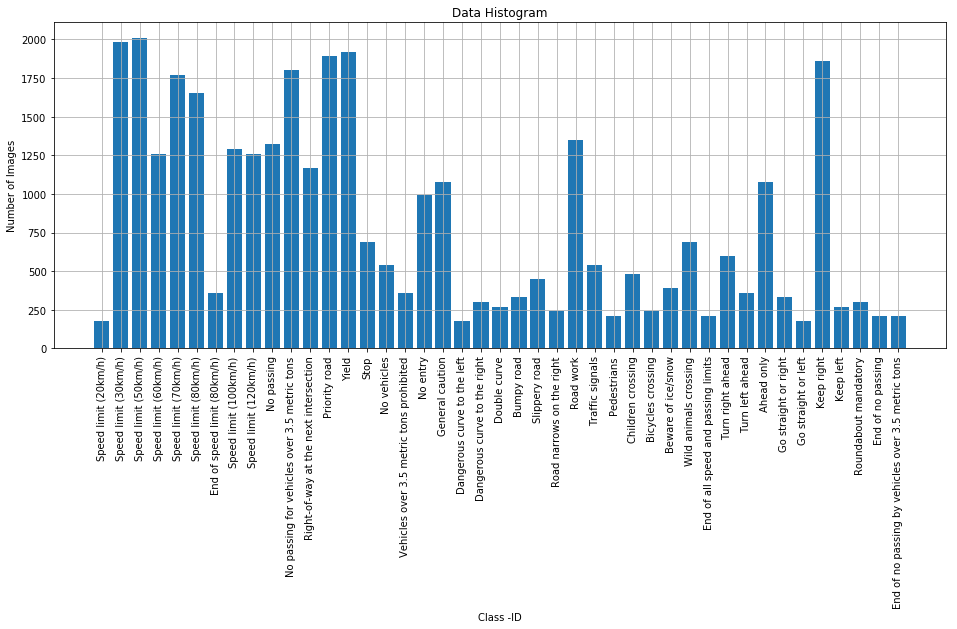

Number of training examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= uint8
Class Number:0 Sign Name:Speed limit (20km/h) Number of Samples:180


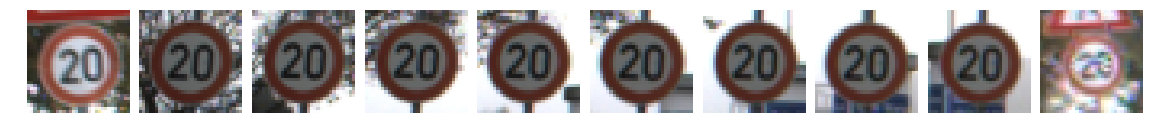

Class Number:1 Sign Name:Speed limit (30km/h) Number of Samples:1980


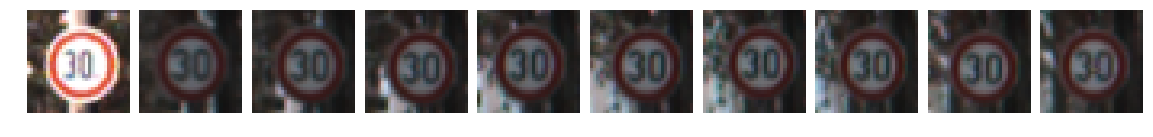

Class Number:2 Sign Name:Speed limit (50km/h) Number of Samples:2010


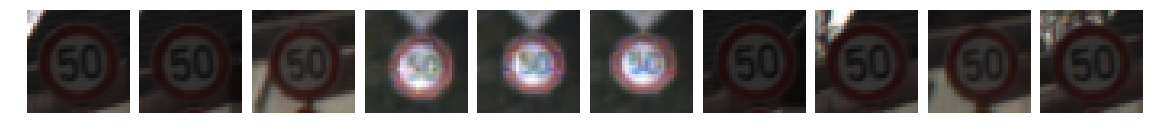

Class Number:3 Sign Name:Speed limit (60km/h) Number of Samples:1260


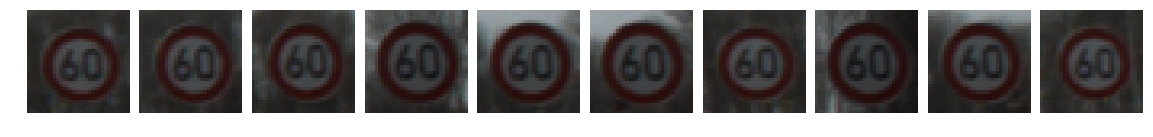

Class Number:4 Sign Name:Speed limit (70km/h) Number of Samples:1770


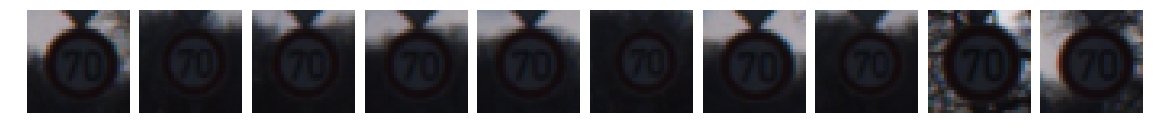

Class Number:5 Sign Name:Speed limit (80km/h) Number of Samples:1650


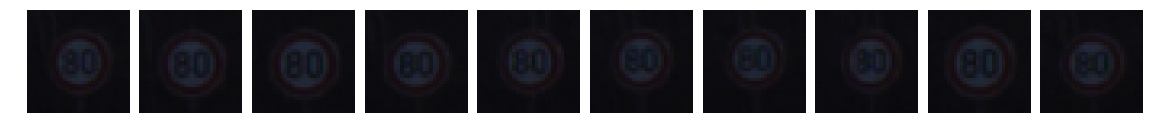

Class Number:6 Sign Name:End of speed limit (80km/h) Number of Samples:360


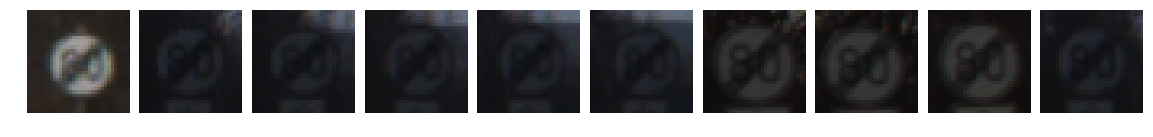

Class Number:7 Sign Name:Speed limit (100km/h) Number of Samples:1290


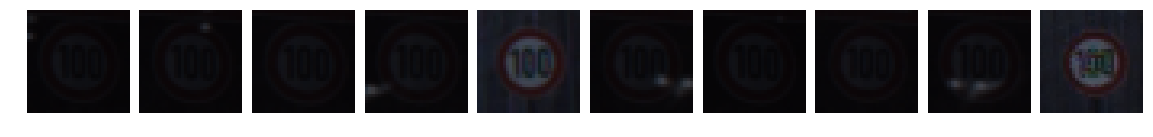

Class Number:8 Sign Name:Speed limit (120km/h) Number of Samples:1260


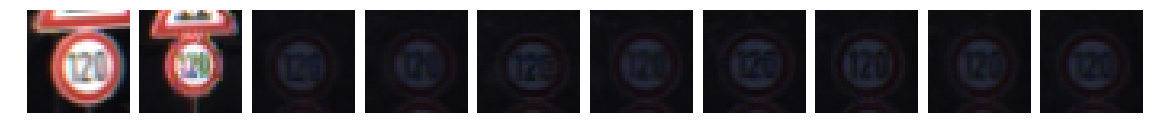

Class Number:9 Sign Name:No passing Number of Samples:1320


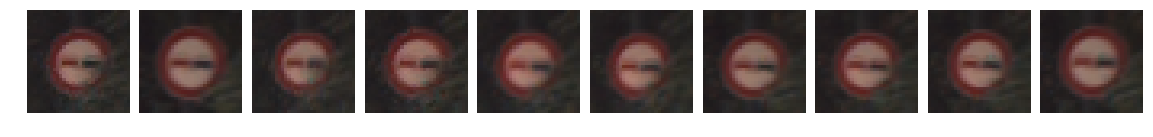

Class Number:10 Sign Name:No passing for vehicles over 3.5 metric tons Number of Samples:1800


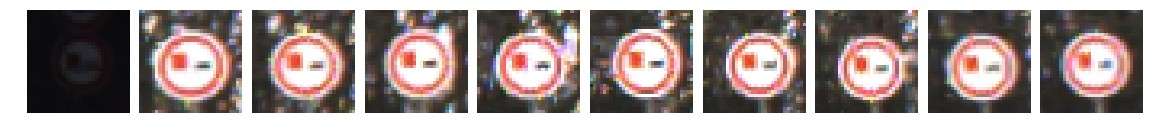

Class Number:11 Sign Name:Right-of-way at the next intersection Number of Samples:1170


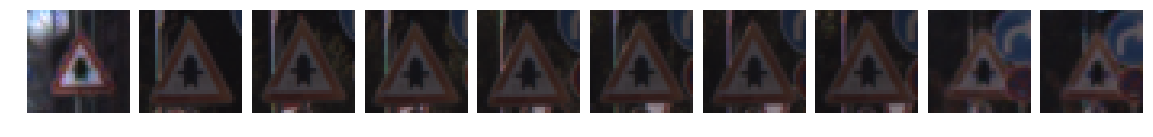

Class Number:12 Sign Name:Priority road Number of Samples:1890


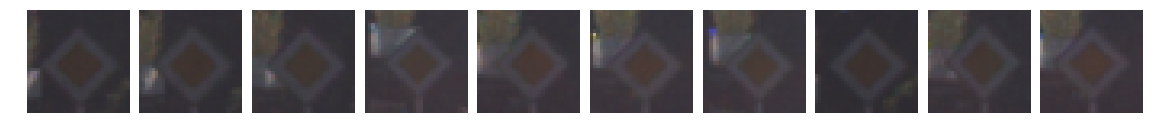

Class Number:13 Sign Name:Yield Number of Samples:1920


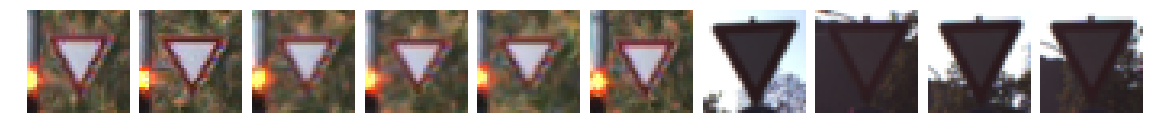

Class Number:14 Sign Name:Stop Number of Samples:690


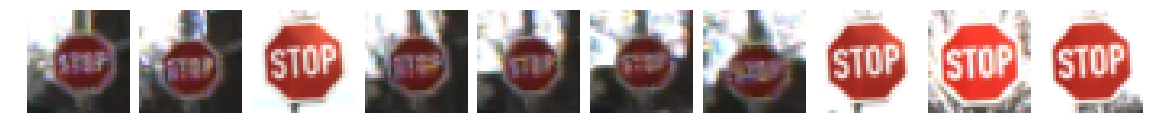

Class Number:15 Sign Name:No vehicles Number of Samples:540


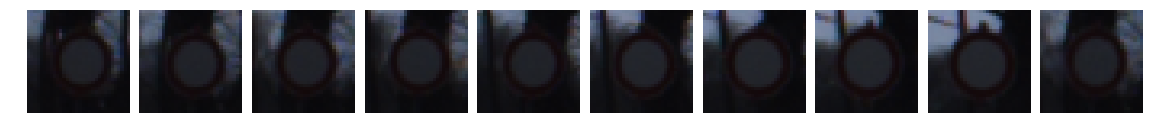

Class Number:16 Sign Name:Vehicles over 3.5 metric tons prohibited Number of Samples:360


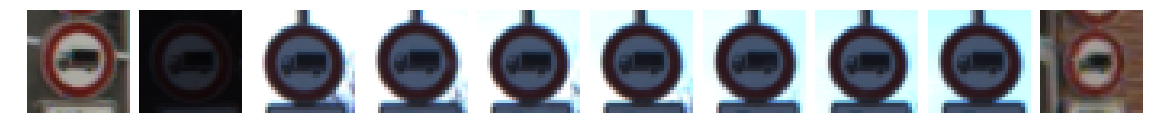

Class Number:17 Sign Name:No entry Number of Samples:990


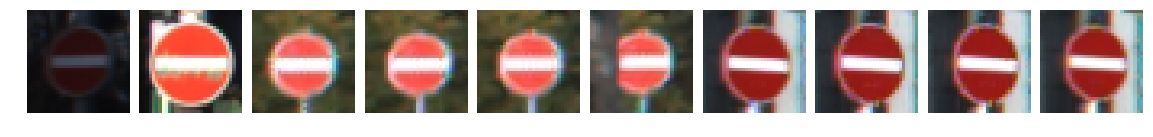

Class Number:18 Sign Name:General caution Number of Samples:1080


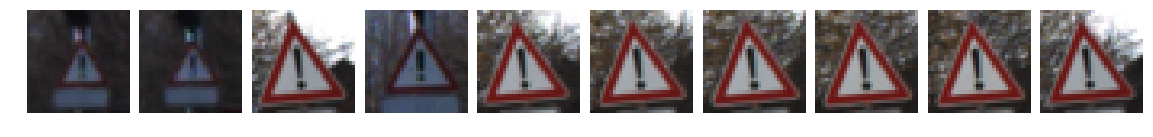

Class Number:19 Sign Name:Dangerous curve to the left Number of Samples:180


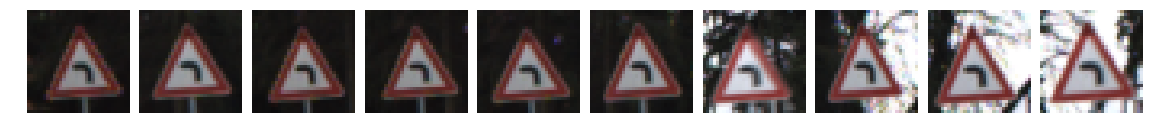

Class Number:20 Sign Name:Dangerous curve to the right Number of Samples:300


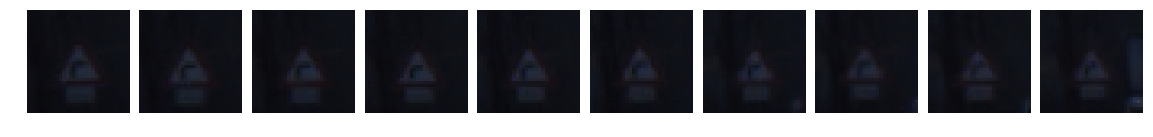

Class Number:21 Sign Name:Double curve Number of Samples:270


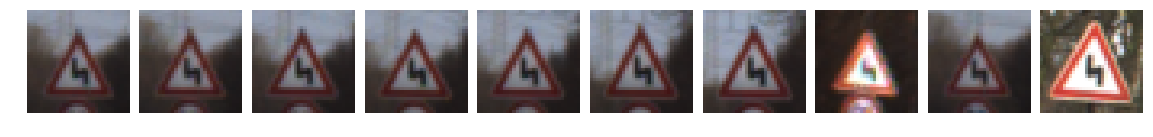

Class Number:22 Sign Name:Bumpy road Number of Samples:330


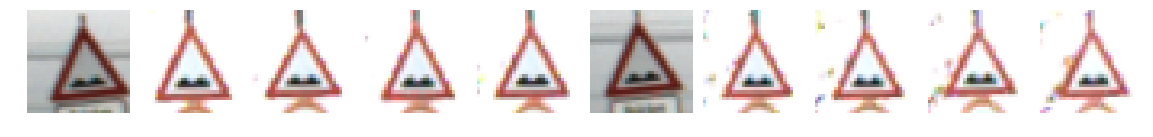

Class Number:23 Sign Name:Slippery road Number of Samples:450


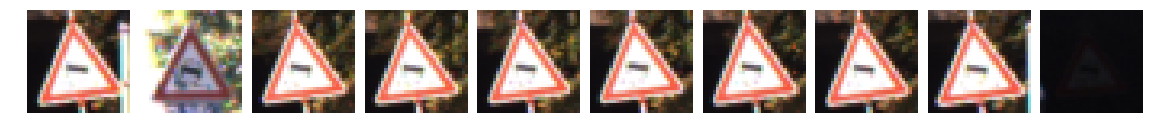

Class Number:24 Sign Name:Road narrows on the right Number of Samples:240


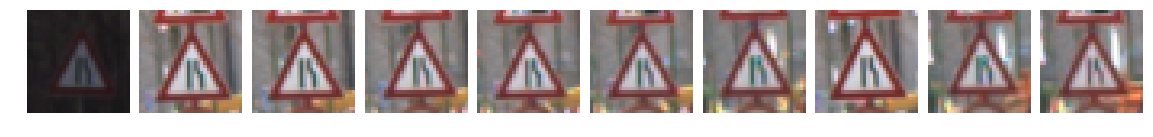

Class Number:25 Sign Name:Road work Number of Samples:1350


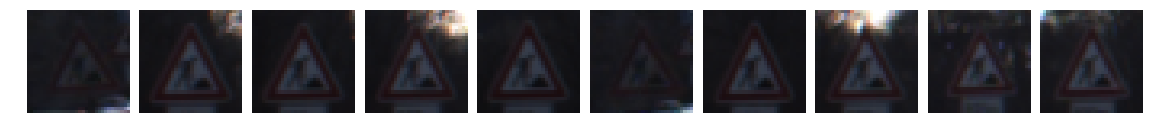

Class Number:26 Sign Name:Traffic signals Number of Samples:540


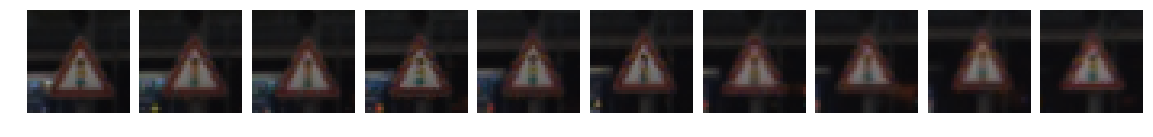

Class Number:27 Sign Name:Pedestrians Number of Samples:210


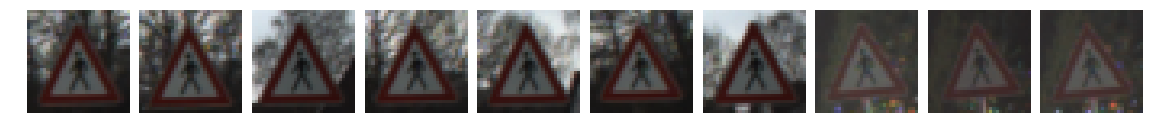

Class Number:28 Sign Name:Children crossing Number of Samples:480


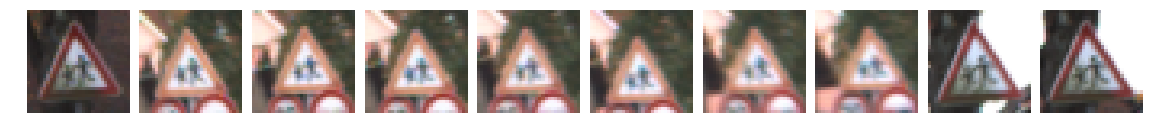

Class Number:29 Sign Name:Bicycles crossing Number of Samples:240


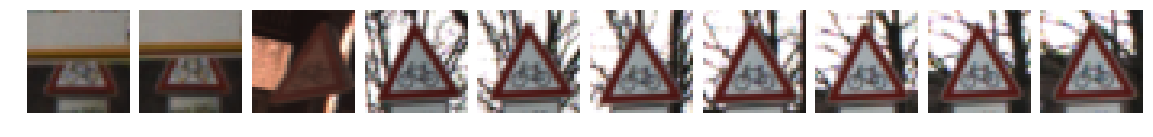

Class Number:30 Sign Name:Beware of ice/snow Number of Samples:390


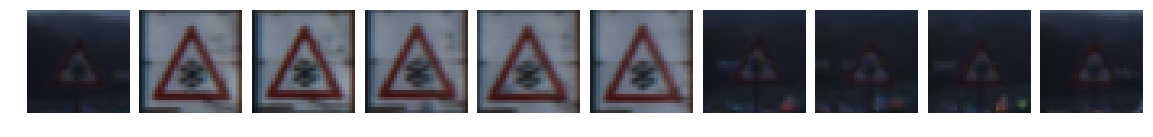

Class Number:31 Sign Name:Wild animals crossing Number of Samples:690


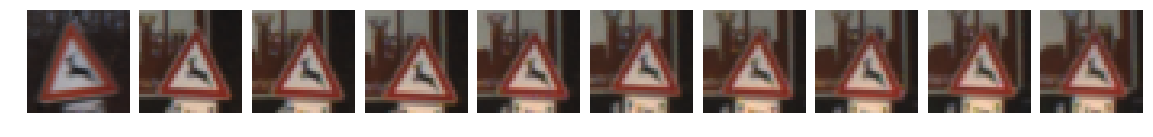

Class Number:32 Sign Name:End of all speed and passing limits Number of Samples:210


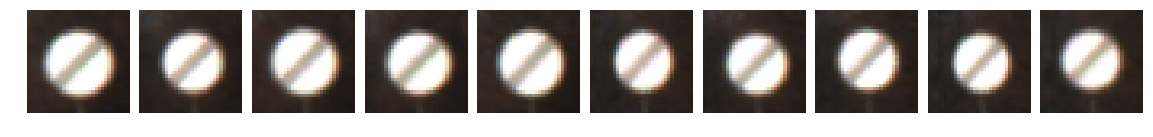

Class Number:33 Sign Name:Turn right ahead Number of Samples:599


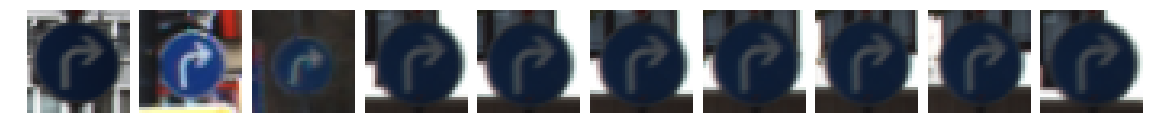

Class Number:34 Sign Name:Turn left ahead Number of Samples:360


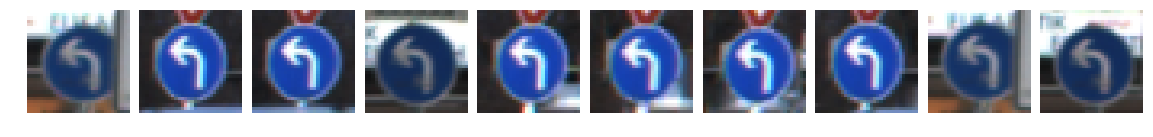

Class Number:35 Sign Name:Ahead only Number of Samples:1080


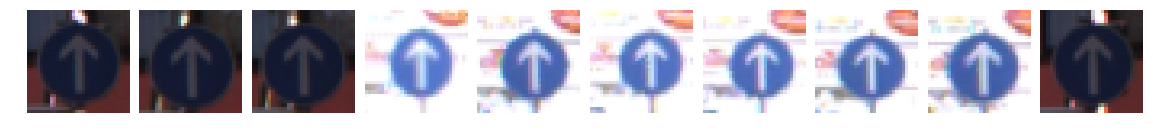

Class Number:36 Sign Name:Go straight or right Number of Samples:330


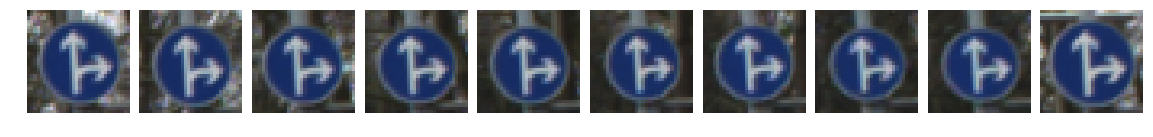

Class Number:37 Sign Name:Go straight or left Number of Samples:180


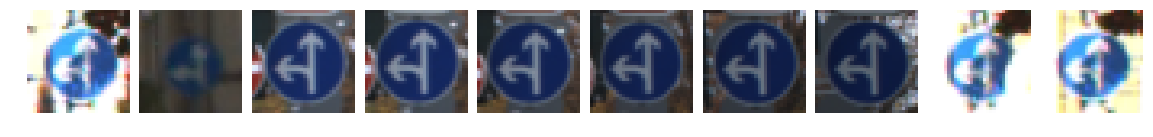

Class Number:38 Sign Name:Keep right Number of Samples:1860


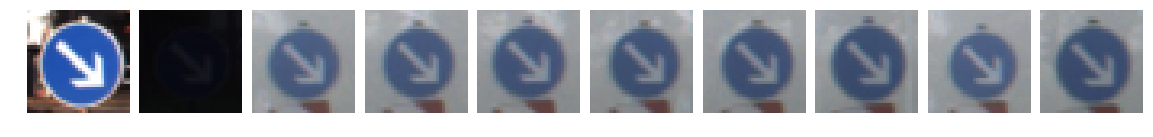

Class Number:39 Sign Name:Keep left Number of Samples:270


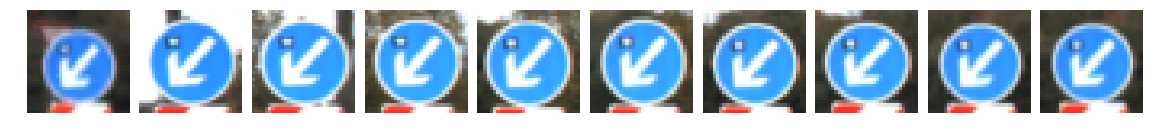

Class Number:40 Sign Name:Roundabout mandatory Number of Samples:300


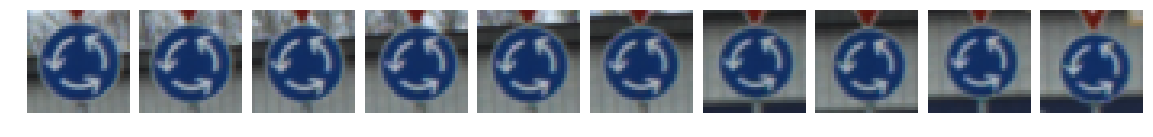

Class Number:41 Sign Name:End of no passing Number of Samples:210


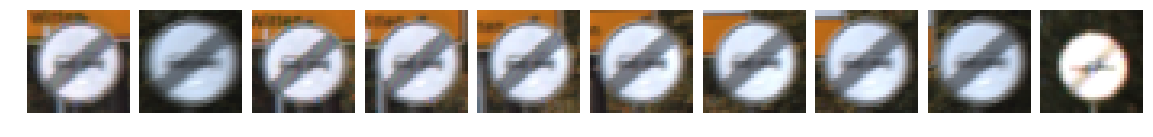

Class Number:42 Sign Name:End of no passing by vehicles over 3.5 metric tons Number of Samples:210


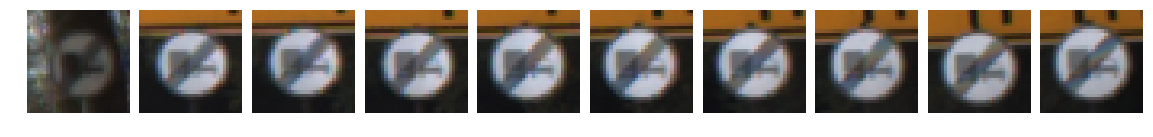

Data and Modules loaded
Data and Modules loaded


In [2]:
train_set = 'train.pickle'
valid_set = 'valid.pickle'
test_set = 'test.pickle'

summarize_histogram(train_set, test_set, valid_set)
X_train, y_train = load_data(train_set)
visualize_dataset(X_train, y_train, view_histogram=True, show_images=True, show_all_classes=True)
X_test,Y_test=load_data(test_set)
# visualize_dataset(X_test,Y_test,view_histogram=True, show_images=True, show_all_classes=True)
X_valid,Y_valid=load_data(valid_set)
# visualize_dataset(X_valid,Y_valid,view_histogram=True, show_images=True, show_all_classes=True)